# Telling labterminologie - werkt niet meer

In [46]:
import requests
import sys
import datetime
import pandas as pd
import numpy as np

In [52]:
url = 'http://labterminologie.nl:8877/apps/lab/helpers/tel-concepten.xquery'
# url = 'http://terminologie.test-nictiz.nl:8877/apps/lab/helpers/tel-concepten.xquery'
url = 'http://localhost:8877/apps/lab/modules/get-concepts-summary.xquery'
response = requests.get(url)
data = response.content
df = pd.read_json(data)
response.status_code

200

In [57]:
df = pd.read_json(data, orient='columns')
df

,concept
0,"{'loinc': '73644-7', 'status': 'active', 'loin..."
1,"{'loinc': '8072-1', 'status': 'active', 'loinc..."
2,"{'loinc': '25723-8', 'status': 'initial', 'loi..."
3,"{'loinc': '30289-3', 'status': 'initial', 'loi..."
4,"{'loinc': '25317-9', 'status': 'active', 'loin..."
...,...
7313,"{'loinc': '35760-8', 'status': 'initial', 'loi..."
7314,"{'loinc': '14853-6', 'status': 'active', 'loin..."
7315,"{'loinc': '552-0', 'status': 'initial', 'loinc..."
7316,"{'loinc': '26601-5', 'status': 'active', 'loin..."


sp = pd.read_csv('specialismen.csv')
df = pd.merge(df, sp, on='class', how='left')
df['specialisme'].fillna('??', inplace=True)

## Totaal per status

Datum: 2020-06-30 16:40


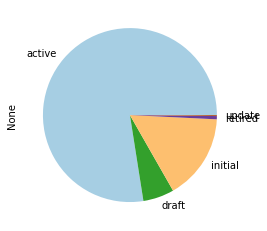

In [37]:
print('Datum: ' + str(datetime.datetime.now())[0:16])
stats = ['initial', 'draft', 'active', 'update', 'retired']
per_class = pd.pivot_table(df, values=stats, index=['class'], aggfunc=np.sum)
per_class.sum().plot.pie(figsize=(4,4), colormap='Paired')

## Totaal per specialisme

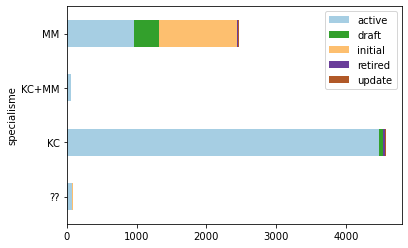

In [38]:
per_spec = pd.pivot_table(df, values=stats, index=['specialisme'], aggfunc=np.sum)
per_spec.plot.barh(stacked=True, colormap='Paired')

## Totaal per class

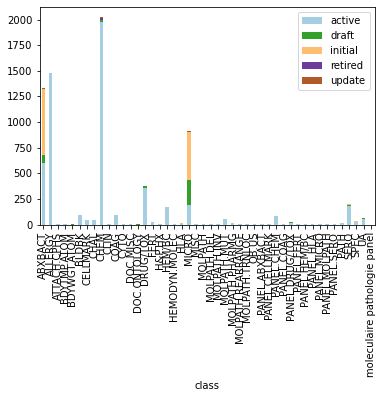

In [39]:
per_class.plot.bar(stacked=True, colormap='Paired')

## Tabel

In [40]:
table = pd.pivot_table(df, index=['specialisme', 'class'], aggfunc=np.sum, margins=True)
stats.append('total')
table[stats]

initial  draft  active  update  \
specialisme class                                                          
??          ATTACH.CPHS                         0      0       1       0   
            BDYTMP.ATOM                         0      0       1       0   
            BDYWGT.ATOM                         0      1       0       0   
            CLIN                                0      0       3       0   
            DOC.MISC                            0      1       1       0   
            DOC.ONTOLOGY                        0      1       0       0   
            H&P.HX                              0      0       1       0   
            HEMODYN.MOLEC                       1      0       1       0   
            MISC                                0      3       4       0   
            MOLPATH.DEL                         0      0       5       0   
            MOLPATH.PHARMG                      0      0      18       0   
            OB.US                               0      3       4       0   
            PANEL.MOLPATH                       0      0       2       0   
            PATH                                2      0      11       0   
            SPEC                               11      1      20       0   
            moleculaire pathologie panel        0      0       0       0   
KC          ALLERGY                             6      0    1474       0   
            BLDBK                               0      0      96       0   
            CELLMARK                            0      1      44       0   
            CHAL                                0      1      41       0   
            CHEM                                0     23    1974       1   
            COAG                                0      6      89       0   
            CYTO                                0      0       1       0   
            DRUG/TOX                            0     13     361       0   
            FERT                                0      0      29       0   
            HEM/BC                              0      1     168       0   
            HLA                                 2      0       9       0   
            MOLPATH.INV                         0      0       2       0   
            MOLPATH.TRNLOC                      0      0       8       0   
            PANEL.CELLMARK                      0      1       5       0   
            PANEL.CHEM                          0      3      83       0   
            PANEL.COAG                          0      0       6       0   
            PANEL.DRUG/TOX                      0      1      19       0   
            PANEL.FERT                          0      0       1       0   
            PANEL.HEM/BC                        0      0       1       0   
            PANEL.HLA                           0      0       1       0   
            UA                                  1      6      55       0   
KC+MM       MOLPATH                             0      0       5       0   
            MOLPATH.MUT                         0      2      57       0   
            MOLPATH.REARRANGE                   0      0       2       0   
MM          ABXBACT                           642     83     596       7   
            MICRO                             464    250     186       5   
            PANEL.ABXBACT                       4      1       2       0   
            PANEL.MICRO                         5      4       1       0   
            PANEL.SERO                          1      0       2       0   
            SERO                                9      9     182       0   
All                                          1148    415    5572      13   

                                          retired  total  
specialisme class                                         
??          ATTACH.CPHS                         0      1  
            BDYTMP.ATOM                         0      1  
            BDYWGT.ATOM                         0      1  
            CLIN      